C:\Users\dhanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


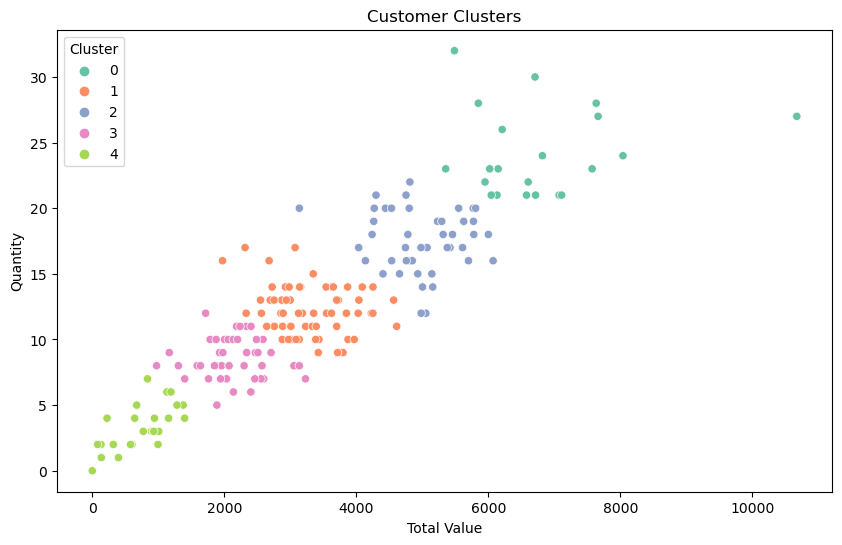

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Load datasets
customers = pd.read_csv(r"C:\Users\dhanu\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\dhanu\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\dhanu\Downloads\Transactions.csv")

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
# Cluster profiling
def perform_clustering():
    # Aggregate transactions
    customer_transactions = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
    merged_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left').fillna(0)

    # Normalize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(merged_data[['TotalValue', 'Quantity']])

    # KMeans Clustering
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    merged_data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data, x='TotalValue', y='Quantity', hue='Cluster', palette='Set2')
    plt.title('Customer Clusters')
    plt.xlabel('Total Value')
    plt.ylabel('Quantity')
    plt.legend(title='Cluster')
    plt.show()

    return merged_data[['CustomerID', 'Cluster']]
clusters = perform_clustering()